In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Rerading the file

In [2]:
df= pd.read_csv('../Data/Raw/health_lifestyle_classification.csv')

# Dropping columns that we consider unnecessary and then dropping NA

In [ ]:
# df.columns

In [4]:
columns_to_drop=['gene_marker_flag', 'income','survey_code', 'bmi_estimated', 'bmi_scaled','bmi_corrected','insurance','occupation','electrolyte_level','education_level']

In [5]:
df_2=df.drop(columns_to_drop,axis=1)
df_2=df_2.dropna()
# df_2.info()

In [ ]:
df_2.select_dtypes('number').columns

# Identifying object columns and dividing them into ordinals and not ordinals

In [ ]:
df_2.select_dtypes('object').columns

In [8]:
df_2['device_usage'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [9]:
df_2['caffeine_intake'].unique()

array(['High', 'Moderate'], dtype=object)

In [10]:
object_col_non_ord=['gender', 'mental_health_support', 'job_type', 'diet_type', 'exercise_type', 'family_history', 'pet_owner']
object_col_ord=['sleep_quality','smoking_level','device_usage','healthcare_access','sunlight_exposure', 'alcohol_consumption','caffeine_intake']

In [11]:
alcohol_mapping = {
    'Regularly': 1,
    'Occasionally': 0
}
df_2['alcohol_consumption'] = df_2['alcohol_consumption'].map(alcohol_mapping)

In [12]:
caffeine_intake_mapping = {'High': 1,'Moderate': 0}
df_2['caffeine_intake'] = df_2['caffeine_intake'].map(caffeine_intake_mapping)

In [13]:
device_usage_map = {'Low': 0,
    'Moderate': 1,
    'High': 2
}  
df_2['device_usage'] = df_2['device_usage'].map(device_usage_map)

In [14]:
quality_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}
df_2['sleep_quality'] = df_2['sleep_quality'].map(quality_mapping)

In [15]:
smoking_map = {
    'Non-smoker': 0,
    'Light': 1,
    'Heavy': 2
}
df_2['smoking_level'] = df_2['smoking_level'].map(smoking_map)

In [16]:
healthcare_access_map = {
    'Poor': 0,
    'Moderate': 1,
    'Good': 2
}
df_2['healthcare_access'] = df_2['healthcare_access'].map(healthcare_access_map)

In [17]:
sunlight_exposure_map = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}
df_2['sunlight_exposure'] = df_2['sunlight_exposure'].map(sunlight_exposure_map)

# Training the encoder

In [18]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe.fit(df_2[object_col_non_ord])

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


# Doing the Split

In [19]:
features = df_2.drop(columns='target')
target = df_2["target"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)
# X_train.info()

In [ ]:
X_train_num=X_train.drop(object_col_non_ord, axis=1)
X_test_num= X_test.drop(object_col_non_ord, axis=1)
X_train_num.info()

# We are creating the new DF after enconding and we are overwriting the X_train and X_test to avoid doing the split again

In [21]:
X_train_trans_np = ohe.transform(X_train[object_col_non_ord])
X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=X_train.index)
X_train=pd.concat([X_train_trans_df,X_train_num],axis=1)


In [22]:
X_test_trans_np = ohe.transform(X_test[object_col_non_ord])
X_test_trans_df = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test=pd.concat([X_test_trans_df,X_test_num],axis=1)
# X_test.info()

In [23]:
X_test.describe()

,gender_Male,mental_health_support_Yes,job_type_Labor,job_type_Office,job_type_Service,job_type_Tech,job_type_Unemployed,diet_type_Omnivore,diet_type_Vegan,diet_type_Vegetarian,...,screen_time,stress_level,mental_health_score,device_usage,healthcare_access,sunlight_exposure,meals_per_day,caffeine_intake,environmental_risk_score,daily_supplement_dosage
count,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,...,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.0,3516.000000
mean,0.490614,0.497156,0.164676,0.159841,0.172639,0.159272,0.170933,0.246871,0.248862,0.253697,...,5.978880,4.920080,4.988908,1.005973,0.995449,1.005404,3.031854,0.490330,5.5,0.091342
std,0.499983,0.500063,0.370940,0.366510,0.377989,0.365981,0.376504,0.431253,0.432415,0.435188,...,2.904292,3.140818,3.144440,0.808714,0.823538,0.823706,1.416066,0.499978,0.0,5.759447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.5,-9.988634
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.907824,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.5,-4.784777
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.924782,5.000000,5.000000,1.000000,1.000000,1.000000,3.000000,0.000000,5.5,0.168487
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,7.963636,8.000000,8.000000,2.000000,2.000000,2.000000,4.000000,1.000000,5.5,5.031553
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,16.000000,10.000000,10.000000,2.000000,2.000000,2.000000,5.000000,1.000000,5.5,9.996532


In [24]:
col_to_minmax=['height', 'weight', 'bmi', 'waist_size', 'blood_pressure','heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours','work_hours', 'physical_activity', 'daily_steps','calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level','mental_health_score',  'meals_per_day', 'environmental_risk_score', 'daily_supplement_dosage']
X_train_minmax=X_train[col_to_minmax]
X_test_minmax=X_test[col_to_minmax]
X_train_minmax_opposite=X_train.drop(col_to_minmax,axis=1)
X_test_minmax_opposite=X_test.drop(col_to_minmax,axis=1)

# Applying the minmaxscaler only to columns that still need to be normalized

In [25]:
normalizer = MinMaxScaler()
normalizer.fit(X_train_minmax)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [26]:
X_train_norm = normalizer.transform(X_train_minmax)
X_test_norm = normalizer.transform(X_test_minmax)

X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train_minmax.columns, index=X_train_minmax.index )
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_test_minmax.columns, index=X_test_minmax.index)

# Now we concat again

In [27]:
X_train_final=pd.concat([X_train_norm_df,X_train_minmax_opposite],axis=1)
X_test_final=pd.concat([X_test_norm_df,X_test_minmax_opposite],axis=1)

# Testing the model

In [37]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_final, y_train)
print(f"The accuracy of the model is {knn.score(X_test_final, y_test)*100: .2f}%")

The accuracy of the model is  66.50%


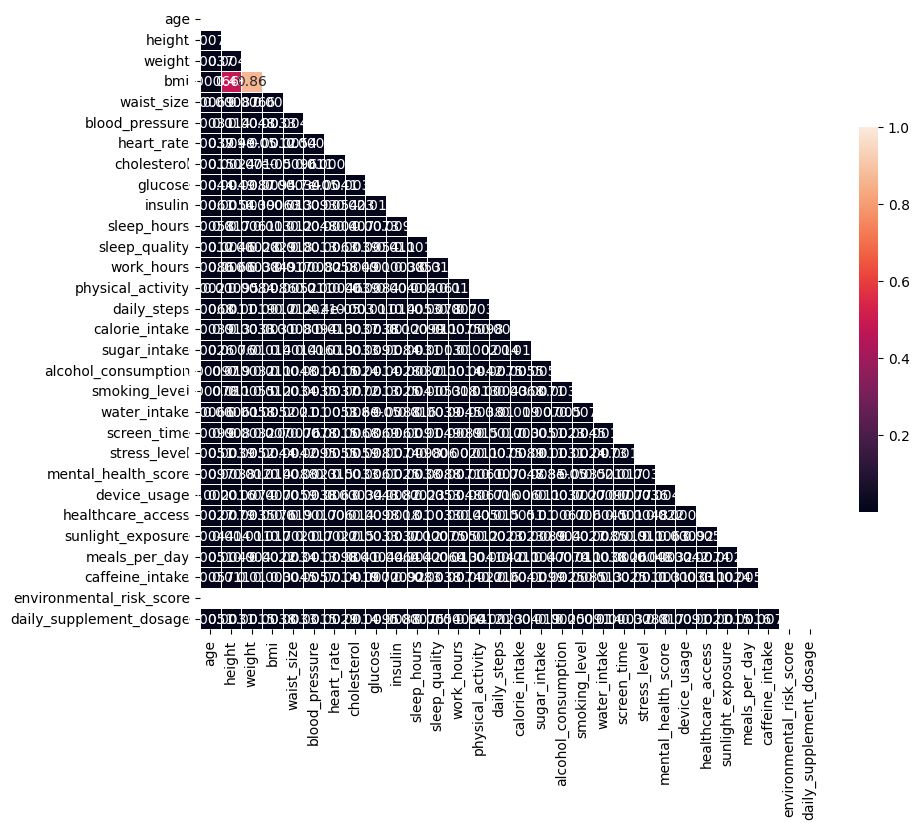

In [ ]:
corr=np.abs(df_2.select_dtypes('number').corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

In [ ]:
# df_2.to_csv('../Data/Clean/Clean_data.csv',index=False)